# Homework 2: Neural Network Training
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(1)

---
### Definining the Neural Network Structure

**Exercise 1 [10/10]**:
Define three values:
- `n_x`: the size of the input data
- `n_h`: the size of hidden layer, i.e., the number neurons in the hidden layer. The default value is $5$
- `n_y`: the size of the output

In [3]:
def neural_network_structure(X, Y, n_h):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [4]:
X = np.random.randn(2, 3)
Y = np.random.randn(1, 3)
n_x, n_h, n_y = neural_network_structure(X, Y, 10)

In [5]:
print("The size of the input data: n_x = " + str(n_x))
print("The size of the hidden layer: n_h = " + str(n_h))
print("The size of the output: n_y = " + str(n_y))

The size of the input data: n_x = 2
The size of the hidden layer: n_h = 10
The size of the output: n_y = 1


---
### Random Initialization

**Excecise 2 [10/10]**: Implement the function `initialize_parameters()`.

1. The function `initialize_parameters()` has input `n_x`, `n_h`, `n_y` as inputs.
2. Use random normal distribution: `stdv * np.random.randn(a.b) + mu`, where `mu = 0.0` and `stdv = 1 / np.sqrt(n_x)` for `W_1` and `stdv = 1 / np.sqrt(n_h)` for `W_2`.
3. Initialize biases as zeros with the correct shape: `np.zeros((a,b))`.
4. Return `parameters` as a dictionary containing all weights and biases.

In [6]:
def initialize_parameters(n_x, n_h, n_y):

    W1 = np.random.randn(n_h, n_x) / np.sqrt(n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [7]:
parameters = initialize_parameters(n_x, n_h, n_y)
W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

In [8]:
print("W1 = " + str(W1))
print("b1 = " + str(b1))
print("W2 = " + str(W2))
print("b2 = " + str(b2))

W1 = [[-0.17633148  1.03386644]
 [-1.45673947 -0.22798339]
 [-0.27156744  0.80169606]
 [-0.77774057 -0.12192515]
 [-0.62073964  0.02984963]
 [ 0.41211259 -0.77825528]
 [ 0.8094419   0.63752091]
 [ 0.35531715  0.63700135]
 [-0.48346861 -0.08689651]
 [-0.66168891 -0.18942548]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.16771312 -0.21872233 -0.12546448 -0.21730309 -0.26727749 -0.21226666
  -0.0040049  -0.35332456  0.07412875  0.52487553]]
b2 = [[0.]]


---
### Sigmoid Function and Its Derivatives

**Exercise 3 [10/10]**:
1. Implement sigmoid function `sigmoid()` as $\sigma(x)=\frac{1}{1+e^{-x}}$.
2. Implement its derivative `sigmoid_derivative()` as $\sigma^{\prime}(x) = \sigma(x) \cdot (1-\sigma(x))$.

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [11]:
x = np.linspace(-5, 5, 10)
s = sigmoid(x)
s_d = sigmoid_derivative(x)

In [12]:
print(s)
print(s_d)

[0.00669285 0.02005754 0.0585369  0.1588691  0.36457644 0.63542356
 0.8411309  0.9414631  0.97994246 0.99330715]
[0.00664806 0.01965523 0.05511033 0.13362971 0.23166046 0.23166046
 0.13362971 0.05511033 0.01965523 0.00664806]


---
### Forward Propogation

 **Exercise 4 [10/10]**: Implementing forward propagation `forward_propagation()`

 1. The function `forward_propagation()` takes `X` and `parameters` as inputs.
 2. Retrieve the weights and bias from `parameters`.
 3. Compute `Z1`, `A1`, `Z2`, and `A2` using the equations above.
 4. Store intermediate variables in `cache` for use in backpropagation.

In [13]:
def forward_propagation(X, parameters):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Implement Forward Propagation to calculate A2
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)
    
    # Store the intermedaite valeus in "cache" for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [14]:
A2, cache = forward_propagation(X, parameters)

In [15]:
print(np.mean(cache['Z1']))
print(np.mean(cache['A1']))
print(np.mean(cache['Z2']))
print(np.mean(cache['A2']))

-0.19151237249896635
0.4688525159515502
-0.3118444809339782
0.42266909957970195


---
### Compute the Cost

**Exercise 5 [10/10]**: Implement `compute_cost()`.

In [16]:
def computer_cost(A2, Y):

    m = Y.shape[1]
    cost = (1 / (2 * m)) * np.sum((A2 - Y) ** 2)
    
    return cost

In [17]:
print(f"cost = {computer_cost(A2, Y)}")

cost = 0.5239053069310721


---
### Back Propagation

**Exercise 6 [10/10]:** Implement `back_propogation()`
1. The function `back_propogation()` takes data `X` and `Y`, weights and biases in `parameters`, and `cache` as inputs.
2. Retrive weights (`W1` and `W_2`) and biase (`b1` and `b2`) from `parameters`.
3. Retrive cached variables (`Z1`, `Z2`, `A1`, and `A2`) from `cache`.
4. Compute the gradients `dW1`, `dW2`, `db1`, `db2` using the provided formulas and you may also need to compute `dZ2` and `dZ1` as needed.
5. Return gradients in a variable `grads`.

In [18]:
def back_propogation(X, Y, parameters, cache):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrieve each value from the dictionary "cache"
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Compute gradients
    m = Y.shape[1]
    dZ2 = (A2 - Y) / m * sigmoid_derivative(Z2)
    dW2 = dZ2 @ A1.T
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = (W2.T @ dZ2) * sigmoid_derivative(Z1)
    dW1 = dZ1 @ X.T
    db1 = np.sum(dZ1, axis = 1, keepdims = True)

    # Stores the gradients
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [19]:
grads = back_propogation(X, Y, parameters, cache)

In [20]:
print ("dW1 = " + str(grads["dW1"]))
print ("db1 = " + str(grads["db1"]))
print ("dW2 = " + str(grads["dW2"]))
print ("db2 = " + str(grads["db2"]))

dW1 = [[-0.00664941  0.00551946]
 [ 0.00666033 -0.00568816]
 [ 0.00529232 -0.00427319]
 [ 0.01028577 -0.00799248]
 [ 0.01305662 -0.0099341 ]
 [ 0.008174   -0.0066037 ]
 [ 0.00021912 -0.00017832]
 [ 0.02062341 -0.01630933]
 [-0.004029    0.00306173]
 [-0.02714012  0.02102039]]
db1 = [[ 4.00223279e-04]
 [-2.71719312e-03]
 [-3.78546949e-04]
 [-1.13124221e-03]
 [-1.15711387e-03]
 [-9.91044386e-04]
 [-1.93340979e-06]
 [ 8.46922963e-04]
 [ 1.30854178e-04]
 [ 1.60536914e-03]]
dW2 = [[ 0.04935606  0.05904166  0.04547199  0.0361181   0.03417343 -0.05364016
  -0.01991294  0.00616847  0.02248469  0.02777064]]
db2 = [[-0.0032622]]


---
### Update Weights and Biases Using Gradient Descent

**Exercise 7 [10/10]**: Implemente `update_parameters()`
1. The function takes `parameters`, `grads`, and `learning_rate` as inputs.
2. Retrive weights and biases from `parameters`.
3. Retrive gradients from `grads`.
4. Update the weights and biases using the gradient descent rule.
5. Store the updated weights and biases back into `parameters` and return them.

In [21]:
def update_parameters(parameters, grads, learning_rate):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Retrive gradients from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # Update weights and biases using gradient descent update rule
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    # Store the updated weights and biases back into "parameters"
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [22]:
parameters = update_parameters(parameters, grads, 0.01)

In [23]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.17626499  1.03381124]
 [-1.45680607 -0.22792651]
 [-0.27162036  0.80173879]
 [-0.77784343 -0.12184523]
 [-0.62087021  0.02994897]
 [ 0.41203085 -0.77818925]
 [ 0.80943971  0.6375227 ]
 [ 0.35511092  0.63716444]
 [-0.48342832 -0.08692713]
 [-0.66141751 -0.18963568]]
b1 = [[-4.00223279e-06]
 [ 2.71719312e-05]
 [ 3.78546949e-06]
 [ 1.13124221e-05]
 [ 1.15711387e-05]
 [ 9.91044386e-06]
 [ 1.93340979e-08]
 [-8.46922963e-06]
 [-1.30854178e-06]
 [-1.60536914e-05]]
W2 = [[ 0.16721956 -0.21931275 -0.1259192  -0.21766427 -0.26761923 -0.21173026
  -0.00380577 -0.35338624  0.07390391  0.52459783]]
b2 = [[3.262196e-05]]


---
### Training Loop

**Exercise 8 [10/10]**: Integrate the preivous parts into a function `train_loop()`.
1. The function `train_loop()` takes input data `(X,Y)` and network size `n_h`, and `learning_rate` with `max_iteration` as inputs.
2. Retrive `(n_x,n_h,n_y)` using `neural_network_structure()`.
3. Initialize the parameters using `initialize_parameters()`.
4. Create a `for` loop to train the network by calling `forward_propagation()` to compute the `cost` and `cach`, `back_propagation()` to compute the `grads`, then `update_parameters()` to update `parameters`.

In [24]:
def train_loop(X, Y, n_h, learning_rate, max_iteration, print_cost = True):
    
    # Retrive (n_x, n_h, n_y)
    n_x, n_h, n_y = neural_network_structure(X, Y, n_h)

    # Initialize the parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    for iter in range(max_iteration):
        
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Compute loss
        cost = computer_cost(A2, Y)
        
        if print_cost:
             print(f"Epoch {iter}: Loss = {cost}")

        # Backward propagation
        grads = back_propogation(X, Y, parameters, cache)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

    return parameters

In [25]:
parameters = train_loop(X, Y, 10, 0.01, 10)

Epoch 0: Loss = 0.5413416581298804
Epoch 1: Loss = 0.5411639794561593
Epoch 2: Loss = 0.5409863314471564
Epoch 3: Loss = 0.540808715111546
Epoch 4: Loss = 0.5406311314554086
Epoch 5: Loss = 0.5404535814821864
Epoch 6: Loss = 0.5402760661926396
Epoch 7: Loss = 0.5400985865848043
Epoch 8: Loss = 0.5399211436539499
Epoch 9: Loss = 0.5397437383925352


---
### Training on Real Dataset

In [26]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
# Flatten the 28x28 images into vectors of 784 elements and normalize to [0, 1]
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0

In [28]:
# Select only the samples of class '0' and '1' for binary classification
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

In [29]:
X_train_binary = X_train[:, train_filter]
y_train_binary = y_train[train_filter].reshape(1, -1)  # Reshape to (1, num_samples)

In [30]:
X_test_binary = X_test[:, test_filter]
y_test_binary = y_test[test_filter].reshape(1, -1)  # Reshape to (1, num_samples)

In [31]:
print(f"Training data shape: {X_train_binary.shape}")
print(f"Training labels shape: {y_train_binary.shape}")
print(f"Testing data shape: {X_test_binary.shape}")
print(f"Testing labels shape: {y_test_binary.shape}")
print("Training labels:", np.unique(y_train_binary))
print("Testing labels:", np.unique(y_test_binary))

Training data shape: (784, 12665)
Training labels shape: (1, 12665)
Testing data shape: (784, 2115)
Testing labels shape: (1, 2115)
Training labels: [0 1]
Testing labels: [0 1]


In [32]:
# Select a few random indices
indices = np.random.choice(X_train_binary.shape[1], size = 5, replace = False)

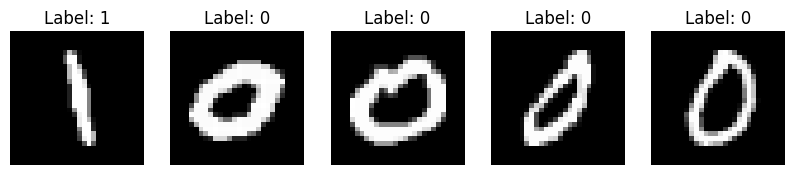

In [33]:
# Plot the images
fig, axes = plt.subplots(1, 5, figsize = (10, 2))

for i, idx in enumerate(indices):
    image = X_train_binary[:, idx].reshape(28, 28)
    label = y_train_binary[0, idx]
    axes[i].imshow(image, cmap = 'gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [34]:
parameters = train_loop(X_train_binary, y_train_binary, 10, 0.01, 10)

Epoch 0: Loss = 0.15423868236507246
Epoch 1: Loss = 0.1538372075502308
Epoch 2: Loss = 0.1534339482553399
Epoch 3: Loss = 0.15302893320861544
Epoch 4: Loss = 0.15262219214320855
Epoch 5: Loss = 0.15221375579440194
Epoch 6: Loss = 0.15180365589554054
Epoch 7: Loss = 0.15139192517266983
Epoch 8: Loss = 0.15097859733785732
Epoch 9: Loss = 0.1505637070811758


---
### Predictions

**Exercise 9 [10/10]:**
1. The function `predict()` takes `X` and `parameters` as inputs.
2. Call `forward_propagation()` to obtain the output `A2`.
3. Assign labels using threshold `0.5`; label class `1` if `A2 > 0.5`.

In [35]:
def predict(X, parameters):

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions

In [36]:
train_predictions = predict(X_train_binary, parameters)
test_predictions = predict(X_test_binary, parameters)

In [37]:
print(f"Training Accuracy: {np.mean(train_predictions == y_train_binary)}")
print(f"Testing Accuracy: {np.mean(test_predictions == y_test_binary)}")

Training Accuracy: 0.5323332017370707
Testing Accuracy: 0.5366430260047281


---
### Tuning Network Hyperparameters

**Exercise 10 [10/10]**: Experiment with different values for network size `n_h` to observe how the network size influences performance.

In [38]:
network_sizes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [39]:
for n_h in network_sizes:
    parameters = train_loop(X_train_binary, y_train_binary, n_h, 0.01, 10, False)
    train_predictions = predict(X_train_binary, parameters)
    test_predictions = predict(X_test_binary, parameters)
    train_accuracy = np.mean(train_predictions == y_train_binary)
    test_accuracy = np.mean(test_predictions == y_test_binary)
    print(f"Network Size: {n_h}, Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}")

Network Size: 5, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 10, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 20, Training Accuracy: 0.46766679826292934, Testing Accuracy: 0.46335697399527187
Network Size: 30, Training Accuracy: 0.4671930517173312, Testing Accuracy: 0.4628841607565012
Network Size: 40, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 50, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 60, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 70, Training Accuracy: 0.5705487564153178, Testing Accuracy: 0.5839243498817966
Network Size: 80, Training Accuracy: 0.484247927358863, Testing Accuracy: 0.4983451536643026
Network Size: 90, Training Accuracy: 0.5323332017370707, Testing Accuracy: 0.5366430260047281
Network Size: 100, Training Accuracy: 0.5267272009474931, 